In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import imageio as im

def linear_transformation(src, a):
  M, N, _ = src.shape
  corners = np.array([[0, 0, N-1, N-1], [0, M-1, 0, M-1]])
  new_points = a.dot(corners).astype(int)

  xcoord = new_points[0,:]
  ycoord = new_points[1,:]
  minx = np.amin(xcoord)
  maxx = np.amax (xcoord)
  miny = np.amin(ycoord)
  maxy = np.amax(ycoord)

  newN = maxx-minx+1
  newM = maxy-miny+1
  dest = np.full((newM, newN, 3), 200)
  y = miny
  for i in range(newM):
    x = minx
    for j in range(newN):
      pts = np.array([[x],[y]])
      newpts = np.linalg.inv(a).dot(pts).round().astype(int)
      if(newpts [0] >= 0 and newpts[0] < N and newpts[1] >= 0 and newpts [1] < M):
        dest[i,j,:] = src[newpts[1],newpts[0],: ]
      x = x+1
    y = y+1
  return dest

def translate(src, d):
  M, N,_ = src.shape
  steps = np.absolute(d)

  newM = M + 2*steps[1]
  newN = N + 2*steps[0]
  dest = np.full((newM, newN, 3), 200)
  for i in range(newM):
    for j in range(newN):
      yp = i-d[1]
      xp = j-d[0]
      if xp >= 0 and xp < N and yp >= 0 and yp < M:
        dest[i,j,:] = src[yp, xp, :]
  return dest


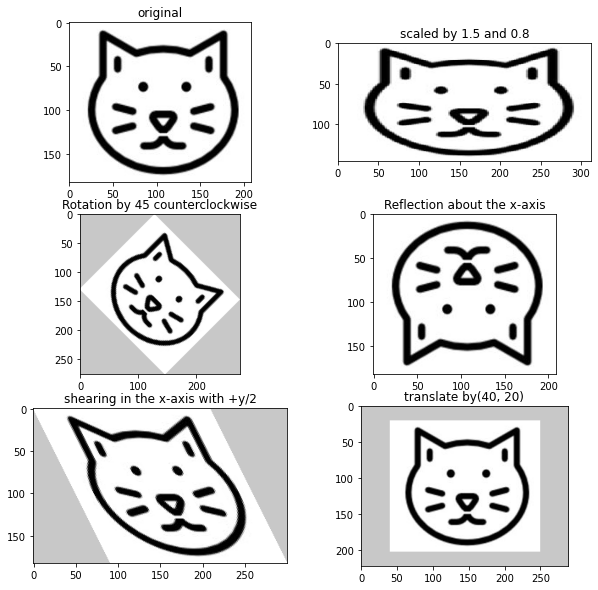

In [ ]:
src = im.imread('Cat.jpg')
plt.figure(figsize=(10,10))
plt.subplot (3,2,1)
plt.title('original')
plt.imshow(src)

a = np.array([[1.5, 0],[0, 0.8]])
dst = linear_transformation(src, a)
plt.subplot(3,2,2)
plt.title('scaled by 1.5 and 0.8')
plt.imshow(dst)

alpha = np.pi/4
a= np.array([[np.cos(alpha), -np.sin(alpha)], [np.sin(alpha), np.cos (alpha)]])
dst = linear_transformation(src, a)
plt.subplot (3,2,3)
plt. title('Rotation by 45 counterclockwise')
plt.imshow(dst)

a = np.array ([[1, 0], [0, -1]])
dst = linear_transformation(src, a)
plt.subplot(3,2,4)
plt.title('Reflection about the x-axis')
plt.imshow(dst)

a = np.array([[1, .5], [0, 1]])
dst = linear_transformation(src, a)
plt.subplot (3,2,5)
plt.title('shearing in the x-axis with +y/2')
plt.imshow(dst)

dst = translate(src, [40, 20])
plt.subplot (3,2,6)
plt.title('translate by(40, 20)')
plt.imshow(dst)
plt.show()